In [239]:
import numpy as num
import matplotlib.pyplot as plot
import random as rand

In [240]:
# function for generating a random list in order
def inOrderList(n):
    output = []
    for i in range(0, n):
        output.append(i)
    return output

# function for generating a random list in reverse order
def reverseOrderList(n):
    output = []
    for i in range(0, n):
        output.append(i)
        
    output.reverse()
    return output

# function for generating a random list of length n
def randomList(n):
    output = []
    
    for i in range(0, n):
        int = num.random.randint(0,1000)
        output.append(int)
        
    return output

# function for generating a random list of n, n times
def constantList(n):
    output = []
    
    for i in range(n):
        output.append(n)
        
    return output


In [241]:
# function to use an insertion sort algorithm
def insertion_sort(input_vals):
    
    newList = []
    compCount = 0
    
    while(len(input_vals) > 0):
        current = input_vals.pop(0)
        
        index = 0
        compCount += 1
        
        while index < len(newList) and newList[index] < current:
            index += 1
            compCount += 2
            
        newList.insert(index, current)
    return compCount

In [242]:
# function to use a merge sort algorithm
def merge_sort(inputList):
    # base case
    if len(inputList) <= 1:
        return (inputList, 1)
    
    # recursive case
    else: 
        n = len(inputList)
        
        # need to split the list
        firstHalf = inputList[: n // 2]
        secHalf = inputList[n // 2 :]
        
        # sort the halves & count the comparisons
        sortFirst, comp1 = merge_sort(firstHalf)
        sortSec, comp2 = merge_sort(secHalf)
        
        jointList = []
        compCount = 0
        
        while len(sortFirst) > 0 and len(sortSec) > 0:
            if sortFirst[0] < sortSec[0]:
                jointList.append(sortFirst.pop(0))
            else:
                jointList.append(sortSec.pop(0))
                
    return jointList + sortFirst + sortSec, compCount + comp1 + comp2

In [243]:
# heap sort logic!
class Heap():
    
    def __init__(self):
        self.items = []
        self.comp_count = 0
    
    # function to add something to the heap
    def add(self, item):
        # need to add it to our item list
        self.items.append(item)
        
        # need to define parent and child indexes
        child_index = len(self.items)-1
        parent_index = (child_index-1)//2
        
        # need to check that the child index is smaller than parents and if its not
        while parent_index > -1 and self.items[child_index] < self.items[parent_index]:
            self.comp_count += 1
            # swap the child and the parent
            self.swap(child_index, parent_index)
            
            # redefine the child & parent index
            child_index = parent_index
            parent_index = (child_index - 1) // 2
        
    # gets the root, or the minimum value from the heap    
    def getMin(self):
        return self.items[0]
    
    # pops the root out of the heap
    def pop(self):
        
        # check the edge cases
        # if list is 0 and if list is 1
        if self.size() == 0:
            self.comp_count += 1
            return None
            
        elif self.size() == 1:
            self.comp_count += 1
            return self.items[0]
        
        # need to set the root to the smallest thing in the heap
        root = self.items[0]
        
        # need to replace the root with the last node put in the heap
        replace = self.items.pop(-1)
        
        # need to put the last node into the first index
        self.items[0] = replace
        
        # define parent child indexes
        parent_index = 0
        lcIndex = 2 * parent_index + 1
        rcIndex = 2 * parent_index + 2            
        
        # try to make sure the heap is valid    
        self.comp_count += 1
        # check that the index of the left child is < the length of the list of items
        while lcIndex < len(self.items):
            # assign baby_index to be index that is to become the new parent index (start w left)
            baby_index = lcIndex
            # check if the right child is less than the left child
            if rcIndex < len(self.items) and self.items[rcIndex] < self.items[lcIndex]:
                baby_index = rcIndex
                self.comp_count += 1
           # check if the baby_index is greater than the value that's to replace the root
            if self.items[baby_index] >= replace:
                break
            # swap the index of the correct baby and the parent
            self.swap(baby_index, parent_index)
            # reassign the parent and child indexes
            parent_index = baby_index
            lcIndex = 2 * parent_index + 1
            rcIndex = 2 * parent_index + 2  
            self.comp_count += 1
        return root
    
    # method for swapping items in different indexes
    def swap(self, this, that):
        # get "this" that you want to swap with "that"
        this_item = self.items[this]
        that_item = self.items[that]
        
        self.items[that] = this_item
        self.items[this] = that_item    
    
    # gets the length of the list
    def size(self):
        return len(self.items)

    # gets the comparison counter
    def compCount(self):
        return self.comp_count

In [244]:
# method for calling Heap() and putting everything into a sorted list
def heap_sort(input_list):
    messy_heap = Heap()
    count = 0
    for item in input_list:
        messy_heap.add(item)
    
    sorted_heap = []
    
    for i in range(messy_heap.size()):
        popped = messy_heap.pop()
        sorted_heap.append(popped)
        
    return messy_heap.compCount()

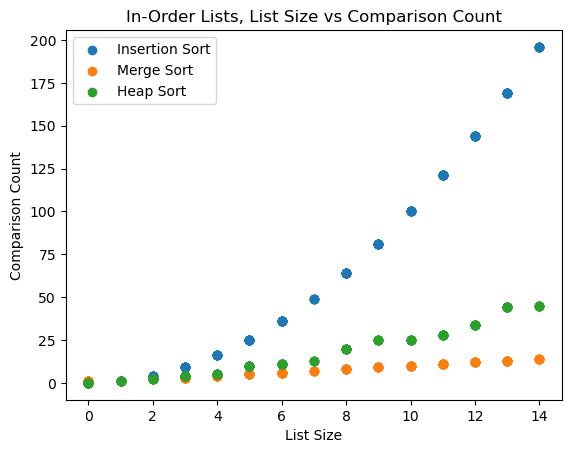

In [245]:
# graph for inOrderList
list_size = []
insert_count = []
merge_count = []
heap_count = []

for i in range(150):
    # need a random number to generate a list of size n
    n = num.random.randint(0, 15)
    list_size.append(n)
    
    newList = inOrderList(n)
    
    iCount = insertion_sort(newList.copy())
    insert_count.append(iCount)
    
    mCount = merge_sort(newList.copy())[1]
    merge_count.append(mCount)
    
    hCount = heap_sort(newList.copy())
    heap_count.append(hCount)
    
plot.scatter(list_size, insert_count, label="Insertion Sort")
plot.scatter(list_size, merge_count, label="Merge Sort")
plot.scatter(list_size, heap_count, label="Heap Sort")
plot.title("In-Order Lists, List Size vs Comparison Count")
plot.xlabel("List Size")
plot.ylabel("Comparison Count")
plot.legend(loc="upper left")
#plot.yscale("log")
plot.show()


# I think it makes sense that Insertion Sort has the worst runtime because insertion sorts runtime is much slower than
# merge-sort's. O(n^2) > O(nlogn). I wasn't sure where heap-sort would land but I think it makes sense that it would be in the middle
# of the two. 

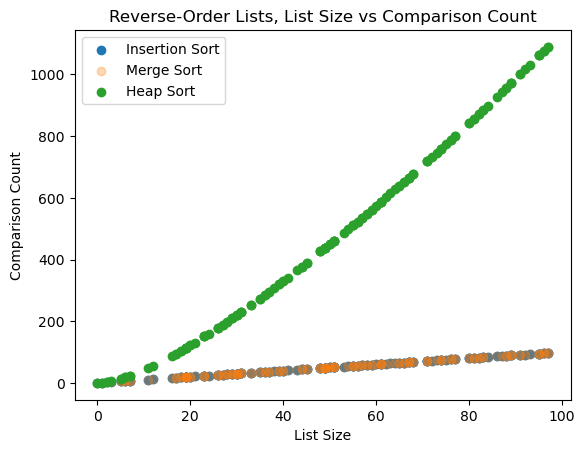

In [246]:
# graph for reverseOrderList
list_size = []
insert_count = []
merge_count = []
heap_count = []

for i in range(150):
    # need a random number to generate a list of size n
    n = num.random.randint(0, 100)
    list_size.append(n)
    
    newList = reverseOrderList(n)
    
    iCount = insertion_sort(newList.copy())
    insert_count.append(iCount)
    
    mCount = merge_sort(newList.copy())[1]
    merge_count.append(mCount)
    
    hCount = heap_sort(newList.copy())
    heap_count.append(hCount)
    
plot.scatter(list_size, insert_count, label="Insertion Sort")
plot.scatter(list_size, merge_count, label="Merge Sort",alpha=0.3)
plot.scatter(list_size, heap_count, label="Heap Sort")
plot.title("Reverse-Order Lists, List Size vs Comparison Count")
plot.xlabel("List Size")
plot.ylabel("Comparison Count")
plot.legend(loc="upper left")
plot.show()

# For reverse-order lists, it makes sense that heap sort had the worst runtime, as a lot of comparisons had to be made when it begins
# with the greatest number and you have to move around and compare the values to get the smallest number at the root. 

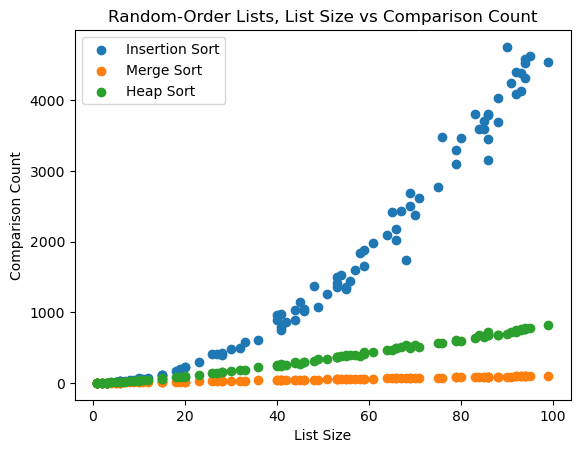

In [247]:
# graph for randomList
list_size = []
insert_count = []
merge_count = []
heap_count = []

for i in range(100):
    # need a random number to generate a list of size n
    n = num.random.randint(0, 100)
    list_size.append(n)
    
    newList = randomList(n)
    
    iCount = insertion_sort(newList.copy())
    insert_count.append(iCount)
    
    mCount = merge_sort(newList.copy())[1]
    merge_count.append(mCount)
    
    hCount = heap_sort(newList.copy())
    heap_count.append(hCount)
    
plot.scatter(list_size, insert_count, label="Insertion Sort")
plot.scatter(list_size, merge_count, label="Merge Sort")
plot.scatter(list_size, heap_count, label="Heap Sort")
plot.title("Random-Order Lists, List Size vs Comparison Count")
plot.xlabel("List Size")
plot.ylabel("Comparison Count")
plot.legend(loc="upper left")
plot.show()

# It's interesting how insertion sort looks like a parabolic function while the other two are more linear. I think that makes sense 
# considering how insertion sort's worst case is O(n^2) and if the list is in random order, insertion sort has to compare more values than
# if the list was in alternating order. 

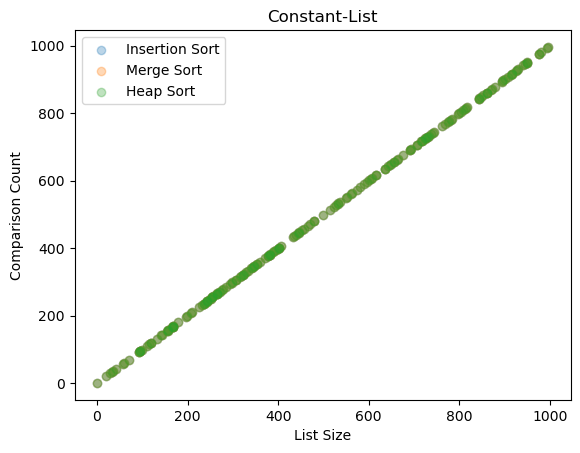

In [248]:
# graph for constantList
list_size = []
insert_count = []
merge_count = []
heap_count = []

for i in range(200):
    # need a random number to generate a list of size n
    n = num.random.randint(0, 1000)
    list_size.append(n)
    
    newList = constantList(n)
    
    iCount = insertion_sort(newList.copy())
    insert_count.append(iCount)
    
    mCount = merge_sort(newList.copy())[1]
    merge_count.append(mCount)
    
    hCount = heap_sort(newList.copy())
    heap_count.append(hCount)
    
plot.scatter(list_size, insert_count, label="Insertion Sort", alpha=0.3)
plot.scatter(list_size, merge_count, label="Merge Sort",alpha=0.3)
plot.scatter(list_size, heap_count, label="Heap Sort",alpha=0.3)
plot.title("Constant-List")
plot.xlabel("List Size")
plot.ylabel("Comparison Count")
plot.legend(loc="upper left")
plot.show()

# I'm not sure if this graph is correct, since it's saying they all had the exact same amount of comparisons, but perhaps it makes sense
# since it would have to compare everything in its list once (n number of times for a list of size n). The graph seems to represent that
# relationship well.